<a href="https://colab.research.google.com/github/lokeshpuma/Deep_Learning/blob/main/1_DigitsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [ ]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

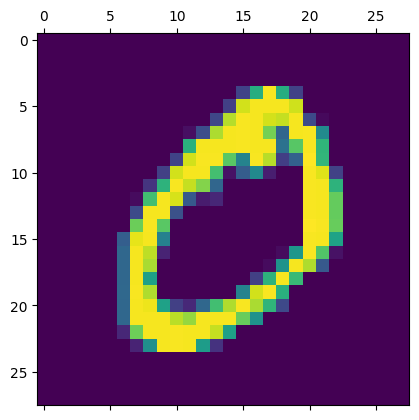

In [ ]:
plt.matshow(X_train[1])

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation= 'sigmoid')
])

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened,y_train, epochs = 5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8141 - loss: 0.7170
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9166 - loss: 0.3049
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9216 - loss: 0.2822
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9232 - loss: 0.2779
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.2686


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9131 - loss: 0.3007


[0.26839494705200195, 0.9246000051498413]

In [ ]:
y_predicted_new = model.predict(X_test_flattened)
y_predicted_labels_new = [np.argmax(i) for i in y_predicted_new]
y_predicted_labels_new[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
cm_new = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels_new)
cm_new

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    1,    1,    0,    0,    1,    4,    0],
       [   0, 1124,    3,    2,    0,    1,    1,    1,    3,    0],
       [   9,    3,  992,    6,    4,    0,    2,    6,   10,    0],
       [   0,    1,    0,  997,    1,    2,    0,    5,    4,    0],
       [   1,    0,    0,    1,  969,    0,    4,    2,    1,    4],
       [   5,    0,    0,   20,    2,  857,    2,    0,    5,    1],
       [  10,    3,    1,    1,    8,    8,  922,    1,    4,    0],
       [   2,    2,    7,    3,    1,    0,    0, 1006,    4,    3],
       [   8,    1,    0,    8,    7,    5,    1,    3,  939,    2],
       [   5,    4,    0,    8,   21,    3,    0,   11,    5,  952]],
      dtype=int32)>

Text(0.5, 1.0, 'Confusion Matrix for Model with Hidden Layer')

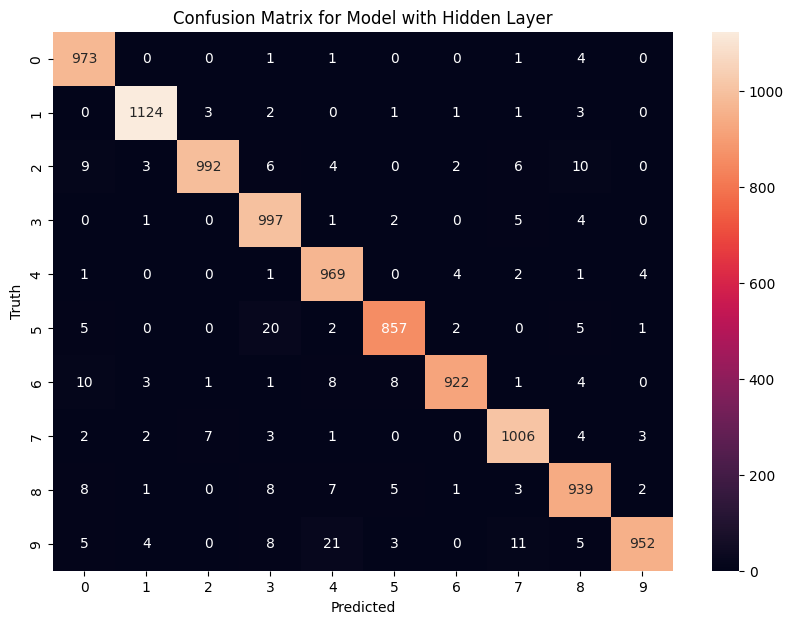

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_new, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Model with Hidden Layer')

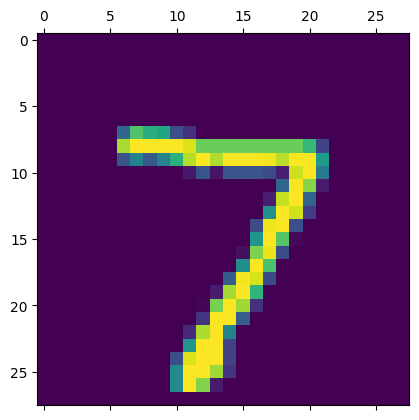

In [ ]:
plt.matshow(X_test[0])

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [ ]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([1.9614687e-02, 3.6428364e-07, 5.7591248e-02, 9.6463811e-01,
       3.1823246e-03, 1.2805313e-01, 1.3497796e-06, 9.9983585e-01,
       1.2222785e-01, 6.7221344e-01], dtype=float32)

In [ ]:
np.argmax(y_predicted[0])

np.int64(7)

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test,predictions=y_predicted_labels)
cm


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    5,    7,    2,    3,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    9,  925,   12,    9,    4,   10,   11,   46,    2],
       [   2,    0,   24,  909,    0,   24,    2,   12,   31,    6],
       [   1,    1,    5,    1,  927,    0,    9,    4,   11,   23],
       [   7,    3,    3,   31,   12,  769,   12,    7,   42,    6],
       [  10,    3,    8,    0,    8,   12,  909,    2,    6,    0],
       [   1,    5,   23,    7,   10,    0,    0,  953,    5,   24],
       [   4,    7,    6,   15,    9,   15,    8,   12,  894,    4],
       [   9,    7,    1,    9,   42,    6,    0,   32,   13,  890]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

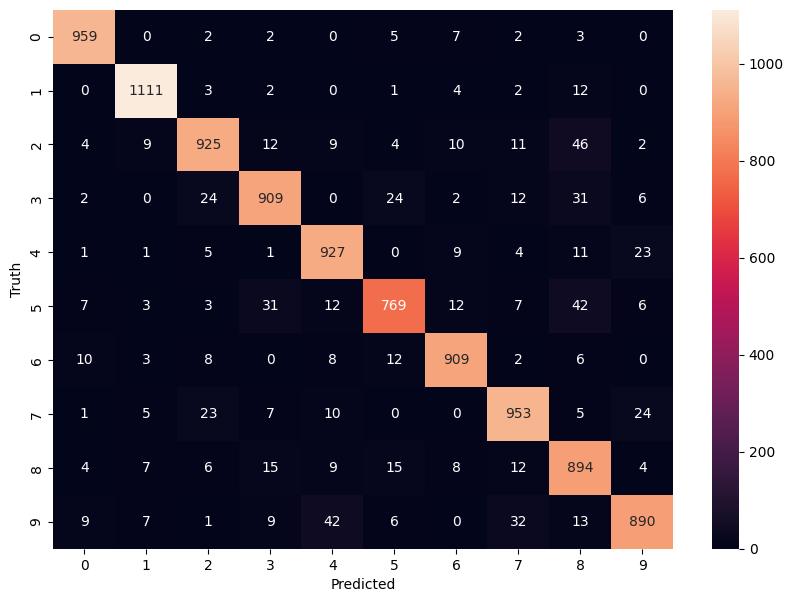

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

with middle layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape= (784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train_flattened,y_train, epochs = 5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8697 - loss: 0.4593
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9615 - loss: 0.1322
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9741 - loss: 0.0872
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9813 - loss: 0.0623
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9860 - loss: 0.0473


In [ ]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.1058


[0.08851591497659683, 0.9731000065803528]

Text(95.72222222222221, 0.5, 'Truth')

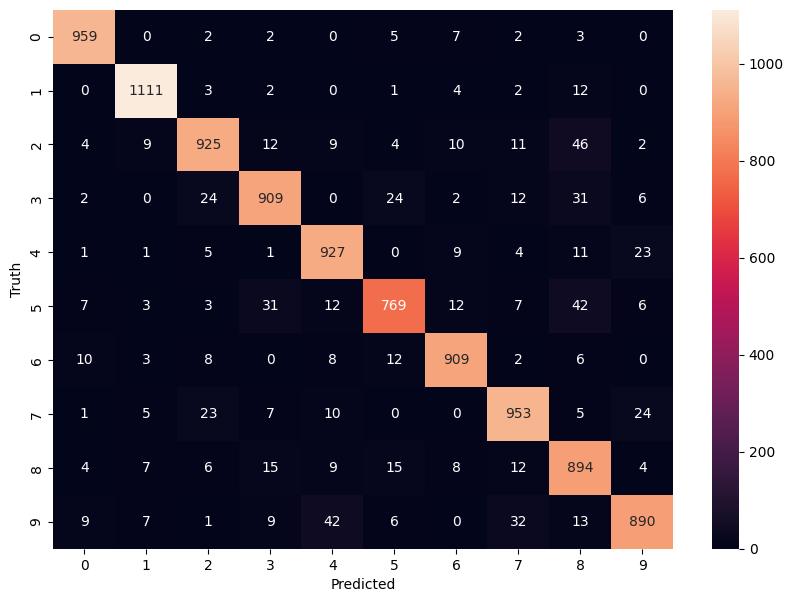

In [ ]:
cm = tf.math.confusion_matrix(labels= y_test,predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')